In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import json

In [3]:
def generate_average_df(algorithms, data_sets, results_path, output_path): 
    output = {}
    for algorithm in algorithms: 
        output[algorithm] = {}
        for data_set in data_sets: 
            results = pd.read_csv(os.path.join(results_path, algorithm, data_set,'results_table.csv'), header=None)
            results = results[4].values
            output[algorithm][data_set] = str(round(np.mean(results), 3)) + " (" + str(round(np.std(results),3)) +")" 
    output_df = pd.DataFrame.from_dict(output)
    output_df.to_latex(os.path.join(output_path, 'average_f1_table.txt'))

In [1]:
def generate_histograms(algorithms, data_sets, results_path, output_path, data_path):
    output = {}
    for algorithm in algorithms: 
        output[algorithm] = {}
        for data_set in data_sets: 
            files = glob.glob(os.path.join(results_path, algorithm, data_set, '*.json'))
            ARL = []
            for file in files: 
                with open(file) as f:
                    result = json.load(f)
                ts_name = result['data_name']
                detected = np.array(result['cp'])[:, 0]
                labels = pd.read_csv(os.path.join(data_path, data_set,"{}_labels.csv".format(ts_name)), header=None)
                labels = labels.values[:,0]
                for cp in detected:
                    dist = labels-cp
                    index = np.argmin(np.abs(labels-cp))
                    ARL.append(dist[index])
            print(len(ARL))
            output[algorithm][data_set] = str(round(np.mean(np.abs(ARL)), 3)) + " (" + str(round(np.std(np.abs(ARL)), 3)) +"), " + str(round(np.median(np.abs(ARL)), 3)) 
            fig = plt.figure(figsize=(6,4))
            plt.hist(ARL, bins = 20, color = 'g', alpha=0.7)
            plt.title('{} ({})'.format(data_set, algorithm))
            fig.savefig('{}/{}_{}'.format(output_path, data_set, algorithm), dpi = 400)
    output_df = pd.DataFrame.from_dict(output)
    output_df.to_latex(os.path.join(output_path, 'arl_table.txt'))
            
 

349
57
91
98
214
112
106
103
272
106
86
101
266
104
85
99


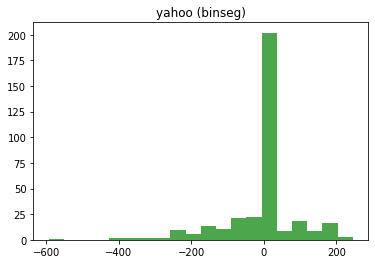

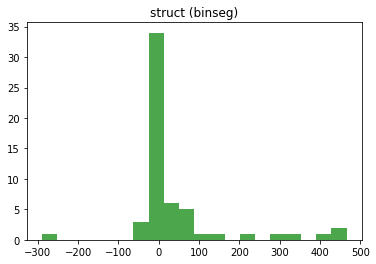

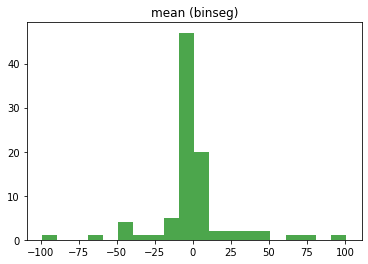

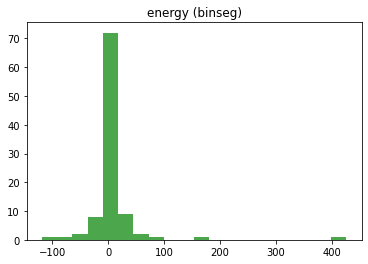

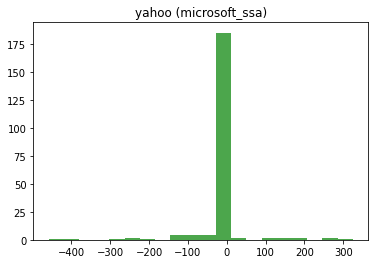

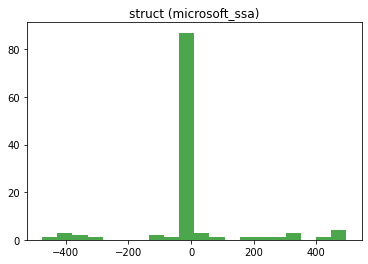

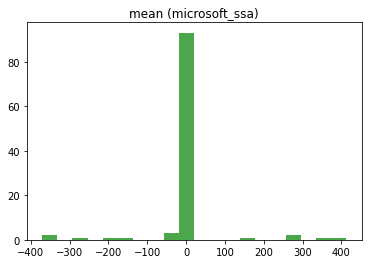

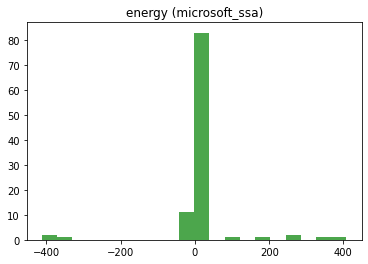

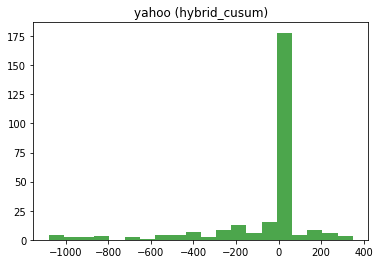

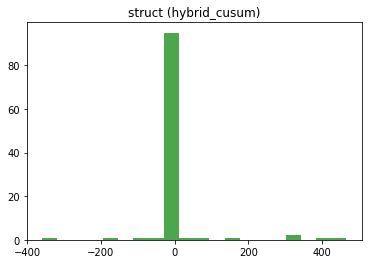

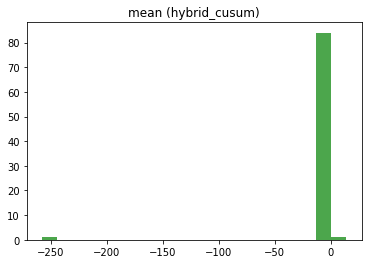

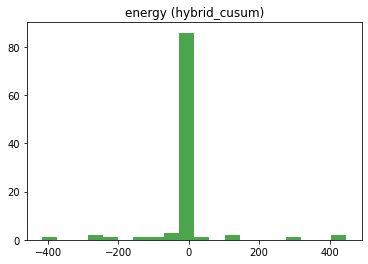

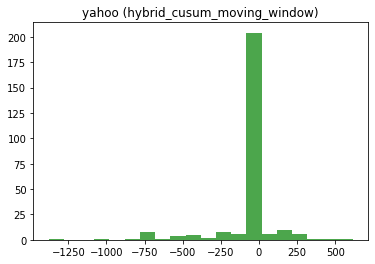

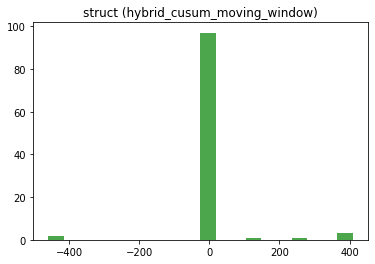

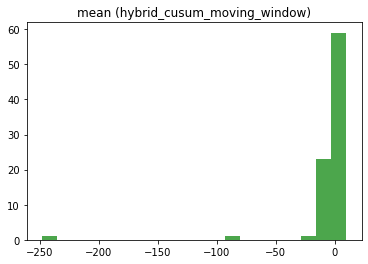

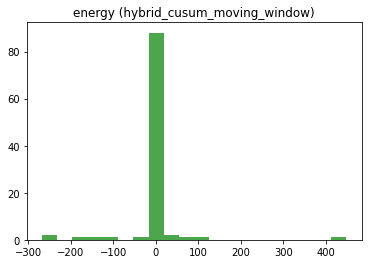

In [9]:
data_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'data')
results_path = os.path.join(os.path.dirname(os.getcwd()), 'test')
output_path = os.path.join(os.path.dirname(os.getcwd()), 'processing')
algorithms = ['binseg', 'microsoft_ssa', 'hybrid_cusum', 'hybrid_cusum_moving_window']
data_sets = ['yahoo', 'struct', 'mean', 'energy']
generate_average_df(algorithms, data_sets, results_path, output_path)
generate_histograms(algorithms, data_sets, results_path, output_path, data_path)